In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import DateOffset

%matplotlib inline

import statsmodels.api as sm

/Users/owentemple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Create Super Dataset

#2012
fire_2012 = pd.read_csv('AFD_CY12 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2012.dropna(inplace=True)
fire_2012.index = pd.to_datetime(fire_2012.index)

#2013
fire_2013 = pd.read_csv('AFD_CY13 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2013.dropna(inplace=True)
fire_2013.index = pd.to_datetime(fire_2013.index)

#2014
fire_2014 = pd.read_csv('AFD_CY14 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2014.dropna(inplace=True)
fire_2014.index = pd.to_datetime(fire_2014.index)

#2015
fire_2015 = pd.read_csv('AFD_CY15 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2015.dropna(inplace=True)
fire_2015.index = pd.to_datetime(fire_2015.index)

#2016
fire_2016 = pd.read_csv('AFD_CY16 - SOC Fire Data Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2016.dropna(inplace=True)
fire_2016.index = pd.to_datetime(fire_2016.index)

#2017
fire_2017 = pd.read_csv('AFD_CY17 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2017.dropna(inplace=True)
fire_2017.index = pd.to_datetime(fire_2017.index)

final_df = pd.concat([fire_2012, fire_2013, fire_2014, fire_2015, fire_2016, fire_2017])


In [3]:
final_df.head()

Master Incident Number  CalendarYear  \
AFD Time Phone Pickup                                         
2012-01-01 00:01:22                  12000002          2012   
2012-01-01 00:11:47                  12000008          2012   
2012-01-01 00:16:14                  12000012          2012   
2012-01-01 00:21:26                  12000015          2012   
2012-01-01 00:26:09                  12000019          2012   

                      Cancellation Status General Dispatched Problem   \
AFD Time Phone Pickup                                                   
2012-01-01 00:01:22         Not Cancelled                        Fire   
2012-01-01 00:11:47         Not Cancelled                     Medical   
2012-01-01 00:16:14         Not Cancelled                     Medical   
2012-01-01 00:21:26         Not Cancelled                       Other   
2012-01-01 00:26:09         Not Cancelled                        Fire   

                      Calltaker Agency (AFD or EMS) Order of AFD Arrival  \
AFD Time Phone Pickup                                                      
2012-01-01 00:01:22                             AFD      1st or Only AFD   
2012-01-01 00:11:47                             EMS      1st or Only AFD   
2012-01-01 00:16:14                             EMS      1st or Only AFD   
2012-01-01 00:21:26                             AFD      1st or Only AFD   
2012-01-01 00:26:09                             AFD      1st or Only AFD   

                      Response Area (COA Only) First Arriving Unit Name  \
AFD Time Phone Pickup                                                     
2012-01-01 00:01:22                    00-2204                    ENG66   
2012-01-01 00:11:47                    00-2206                    ENG22   
2012-01-01 00:16:14                    00-2403                    ENG24   
2012-01-01 00:21:26                    00-3001                    ENG30   
2012-01-01 00:26:09                    00-1902                    QNT19   

                      Response Status PriorityDescription  \
AFD Time Phone Pickup                                       
2012-01-01 00:01:22            Code 3                  4F   
2012-01-01 00:11:47            Code 3                  1M   
2012-01-01 00:16:14            Code 3                  2M   
2012-01-01 00:21:26            Code 3                  3F   
2012-01-01 00:26:09            Code 3                  4F   

                      EMS Time Phone Pickup Earliest Time Phone Pickup  \
AFD Time Phone Pickup                                                    
2012-01-01 00:01:22                       -        01/01/2012 00:01:22   
2012-01-01 00:11:47                       -        01/01/2012 00:11:47   
2012-01-01 00:16:14                       -        01/01/2012 00:16:14   
2012-01-01 00:21:26                       -        01/01/2012 00:21:26   
2012-01-01 00:26:09                       -        01/01/2012 00:26:09   

                       First Unit Assigned Did not Reduce to Code 1  \
AFD Time Phone Pickup                                                 
2012-01-01 00:01:22    01/01/2012 00:01:58                       No   
2012-01-01 00:11:47    01/01/2012 00:12:36                       No   
2012-01-01 00:16:14    01/01/2012 00:16:40                       No   
2012-01-01 00:21:26    01/01/2012 00:22:13                       No   
2012-01-01 00:26:09    01/01/2012 00:26:41                       No   

                      Onscene Time Was Correct  Latitude  Longitude  \
AFD Time Phone Pickup                                                 
2012-01-01 00:01:22             Yes/Left Blank  30228693   97702907   
2012-01-01 00:11:47             Yes/Left Blank  30222216   97705176   
2012-01-01 00:16:14             Yes/Left Blank  30172163   97743423   
2012-01-01 00:21:26             Yes/Left Blank  30372899   97696675   
2012-01-01 00:26:09             Yes/Left Blank  30352693   97776605   

                        First Unit Enroute   First Unit Arrived  
A

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 302436 entries, 2012-01-01 00:01:22 to 2017-11-09 01:12:20
Data columns (total 19 columns):
Master Incident Number           302436 non-null int64
CalendarYear                     302436 non-null int64
Cancellation Status              302436 non-null object
General Dispatched Problem       302436 non-null object
Calltaker Agency (AFD or EMS)    302436 non-null object
Order of AFD Arrival             302436 non-null object
Response Area (COA Only)         302436 non-null object
First Arriving Unit Name         302436 non-null object
Response Status                  302436 non-null object
PriorityDescription              302436 non-null object
EMS Time Phone Pickup            302436 non-null object
Earliest Time Phone Pickup       302436 non-null object
First Unit Assigned              302436 non-null object
Did not Reduce to Code 1         302436 non-null object
Onscene Time Was Correct         302436 non-null object
Latitude         

In [5]:
final_df.describe()

Master Incident Number   CalendarYear      Latitude     Longitude
count            3.024360e+05  302436.000000  3.024360e+05  3.024360e+05
mean             1.445339e+07    2014.393111  3.025670e+07  9.761881e+07
std              1.672434e+06       1.672922  1.051681e+06  3.384386e+06
min              1.000000e+00    2012.000000  0.000000e+00  0.000000e+00
25%              1.305387e+07    2013.000000  3.023244e+07  9.770031e+07
50%              1.410430e+07    2014.000000  3.028130e+07  9.773554e+07
75%              1.603886e+07    2016.000000  3.035207e+07  9.776438e+07
max              1.711014e+07    2017.000000  3.051518e+07  9.792725e+07

In [6]:
final_df['Response Area (COA Only)'].value_counts().sort_index()

00-0020        1
00-0040       70
00-0060       37
00-0070       74
00-0080       11
00-0090        2
00-0101    11356
00-0102     8173
00-0103       16
00-0201     2911
00-0202     2171
00-0203     1358
00-0301     2675
00-0302     1194
00-0303     1708
00-0401     2201
00-0402      291
00-0501     4206
00-0502     2046
00-0503      485
00-0504     1019
00-0505      987
00-0601     3079
00-0602     1032
00-0603     2482
00-0604     1452
00-0701     5455
00-0702     2516
00-0801     2656
00-0802     1481
           ...  
00-4502      397
00-4503      283
00-4504      337
00-4505      241
00-4506      116
00-4507       27
00-4508       43
00-4601       21
00-4602       73
00-4603       21
00-4604        5
00-4605       18
00-4606       81
00-4607       51
00-4608       78
00-4609      158
00-4610       24
00-4703        1
04-2304        2
04-2604        9
04-2605        1
04-2608        1
04-2609        3
04-2801        1
04-2808        1
04-4103        1
04-4406        1
04-4701       

In [7]:
final_df['First Unit Arrived']

AFD Time Phone Pickup
2012-01-01 00:01:22    01/01/2012 00:05:11
2012-01-01 00:11:47    01/01/2012 00:15:13
2012-01-01 00:16:14    01/01/2012 00:19:44
2012-01-01 00:21:26    01/01/2012 00:26:35
2012-01-01 00:26:09    01/01/2012 00:35:34
2012-01-01 00:35:36    01/01/2012 00:43:17
2012-01-01 00:44:26    01/01/2012 00:50:06
2012-01-01 00:46:52    01/01/2012 00:54:59
2012-01-01 00:55:57    01/01/2012 01:01:13
2012-01-01 01:02:24    01/01/2012 01:06:51
2012-01-01 01:03:25    01/01/2012 01:12:33
2012-01-01 01:21:28    01/01/2012 01:25:48
2012-01-01 01:28:31    01/01/2012 01:31:26
2012-01-01 01:28:48    01/01/2012 01:37:16
2012-01-01 01:32:39    01/01/2012 01:38:08
2012-01-01 01:37:32    01/01/2012 01:44:08
2012-01-01 01:55:42    01/01/2012 02:00:25
2012-01-01 02:01:08    01/01/2012 02:06:55
2012-01-01 02:11:47    01/01/2012 02:16:47
2012-01-01 02:13:14    01/01/2012 02:16:24
2012-01-01 02:14:53    01/01/2012 02:20:37
2012-01-01 02:16:48    01/01/2012 02:24:00
2012-01-01 02:18:25    01/01/201

In [8]:
final_df['First Unit Arrived'] = pd.to_datetime(final_df['First Unit Arrived'])

In [9]:
final_df['First Unit Arrived']

AFD Time Phone Pickup
2012-01-01 00:01:22   2012-01-01 00:05:11
2012-01-01 00:11:47   2012-01-01 00:15:13
2012-01-01 00:16:14   2012-01-01 00:19:44
2012-01-01 00:21:26   2012-01-01 00:26:35
2012-01-01 00:26:09   2012-01-01 00:35:34
2012-01-01 00:35:36   2012-01-01 00:43:17
2012-01-01 00:44:26   2012-01-01 00:50:06
2012-01-01 00:46:52   2012-01-01 00:54:59
2012-01-01 00:55:57   2012-01-01 01:01:13
2012-01-01 01:02:24   2012-01-01 01:06:51
2012-01-01 01:03:25   2012-01-01 01:12:33
2012-01-01 01:21:28   2012-01-01 01:25:48
2012-01-01 01:28:31   2012-01-01 01:31:26
2012-01-01 01:28:48   2012-01-01 01:37:16
2012-01-01 01:32:39   2012-01-01 01:38:08
2012-01-01 01:37:32   2012-01-01 01:44:08
2012-01-01 01:55:42   2012-01-01 02:00:25
2012-01-01 02:01:08   2012-01-01 02:06:55
2012-01-01 02:11:47   2012-01-01 02:16:47
2012-01-01 02:13:14   2012-01-01 02:16:24
2012-01-01 02:14:53   2012-01-01 02:20:37
2012-01-01 02:16:48   2012-01-01 02:24:00
2012-01-01 02:18:25   2012-01-01 02:22:15
2012-01-01 0

In [10]:
final_df['Response Time (s)'] = (final_df['First Unit Arrived'] - final_df.index).astype('timedelta64[s]')
final_df['Response Time (m)'] = ((final_df['First Unit Arrived'] - final_df.index).astype('timedelta64[s]'))/60

In [11]:
final_df.head()

Master Incident Number  CalendarYear  \
AFD Time Phone Pickup                                         
2012-01-01 00:01:22                  12000002          2012   
2012-01-01 00:11:47                  12000008          2012   
2012-01-01 00:16:14                  12000012          2012   
2012-01-01 00:21:26                  12000015          2012   
2012-01-01 00:26:09                  12000019          2012   

                      Cancellation Status General Dispatched Problem   \
AFD Time Phone Pickup                                                   
2012-01-01 00:01:22         Not Cancelled                        Fire   
2012-01-01 00:11:47         Not Cancelled                     Medical   
2012-01-01 00:16:14         Not Cancelled                     Medical   
2012-01-01 00:21:26         Not Cancelled                       Other   
2012-01-01 00:26:09         Not Cancelled                        Fire   

                      Calltaker Agency (AFD or EMS) Order of AFD Arrival  \
AFD Time Phone Pickup                                                      
2012-01-01 00:01:22                             AFD      1st or Only AFD   
2012-01-01 00:11:47                             EMS      1st or Only AFD   
2012-01-01 00:16:14                             EMS      1st or Only AFD   
2012-01-01 00:21:26                             AFD      1st or Only AFD   
2012-01-01 00:26:09                             AFD      1st or Only AFD   

                      Response Area (COA Only) First Arriving Unit Name  \
AFD Time Phone Pickup                                                     
2012-01-01 00:01:22                    00-2204                    ENG66   
2012-01-01 00:11:47                    00-2206                    ENG22   
2012-01-01 00:16:14                    00-2403                    ENG24   
2012-01-01 00:21:26                    00-3001                    ENG30   
2012-01-01 00:26:09                    00-1902                    QNT19   

                      Response Status PriorityDescription        ...          \
AFD Time Phone Pickup                                            ...           
2012-01-01 00:01:22            Code 3                  4F        ...           
2012-01-01 00:11:47            Code 3                  1M        ...           
2012-01-01 00:16:14            Code 3                  2M        ...           
2012-01-01 00:21:26            Code 3                  3F        ...           
2012-01-01 00:26:09            Code 3                  4F        ...           

                      Earliest Time Phone Pickup  First Unit Assigned  \
AFD Time Phone Pickup                                                   
2012-01-01 00:01:22          01/01/2012 00:01:22  01/01/2012 00:01:58   
2012-01-01 00:11:47          01/01/2012 00:11:47  01/01/2012 00:12:36   
2012-01-01 00:16:14          01/01/2012 00:16:14  01/01/2012 00:16:40   
2012-01-01 00:21:26          01/01/2012 00:21:26  01/01/2012 00:22:13   
2012-01-01 00:26:09          01/01/2012 00:26:09  01/01/2012 00:26:41   

                      Did not Reduce to Code 1 Onscene Time Was Correct  \
AFD Time Phone Pickup                                                     
2012-01-01 00:01:22                         No           Yes/Left Blank   
2012-01-01 00:11:47                         No           Yes/Left Blank   
2012-01-01 00:16:14                         No           Yes/Left Blank   
2012-01-01 00:21:26                         No           Yes/Left Blank   
2012-01-01 00:26:09                         No           Yes/Left Blank   

                       Latitude  Longitude   First Unit Enroute  \
AFD Time Phone Pickup                                             
2012-01-01 00:01:22    30228693   97702907  01/01/2012 00:03:29   
2012-01-01 00:11:47    30222216   97705176  01/01/2012 00:13:07   
2012-01-01 00:16:14    30172163   97743423  01/01/2012 00:16:51   
2012-01-01 00:21:26    30372899   97696675  01/01/2012 00:22:52   
2012-01-0

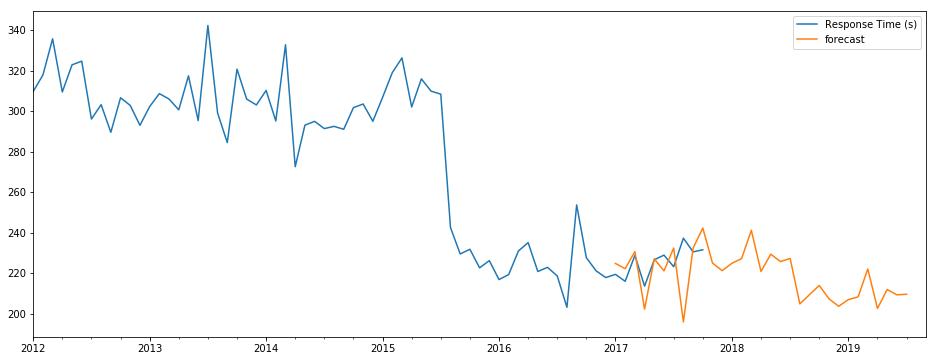

In [22]:
#Create Dataframe
RA__00_01XX_df = final_df[final_df['Response Area (COA Only)'].str.startswith('00-01')]

#Group By Month and create new dataframe
RA__00_01XX_month_df = RA__00_01XX_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
RA__00_01XX_month_df.columns = ['Response Time (s)']
#Drop the last column. Its an outlier
RA__00_01XX_month_df.drop(RA__00_01XX_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA__00_01XX_month_df['Response Time (s)'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA__00_01XX_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_01XX_month_df.columns)

future_final_df = pd.concat([RA__00_01XX_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)


future_final_df[['Response Time (s)', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('Response Time Prediction for RA 00-01XX.csv')

## Moore's Crossing

In [23]:
#Create Dataframe
RA__00_4209_df = final_df[(final_df['Response Area (COA Only)']=='00-4209')]

#Group By Month and create new dataframe
RA__00_4209_month_df = RA__00_4209_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
RA__00_4209_month_df.columns = ['Response Time (s)']
#Drop the last column. Its an outlier
RA__00_4209_month_df.drop(RA__00_4209_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA__00_4209_month_df['Response Time (s)'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA__00_4209_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_4209_month_df.columns)

future_final_df = pd.concat([RA__00_4209_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)


future_final_df[['Response Time (s)', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('Response Time Prediction for RA 00-4209.csv')

ValueError: maxlag should be < nobs

In [ ]:
#00-01XX Downtown
#00-4209 Moore's Crossing

#00-2608
#00-0504 Eastern Crescent
#00-0505 Eastern Crescent

#00-2405
#00-2404
#00-2403

## Eastern Crescent

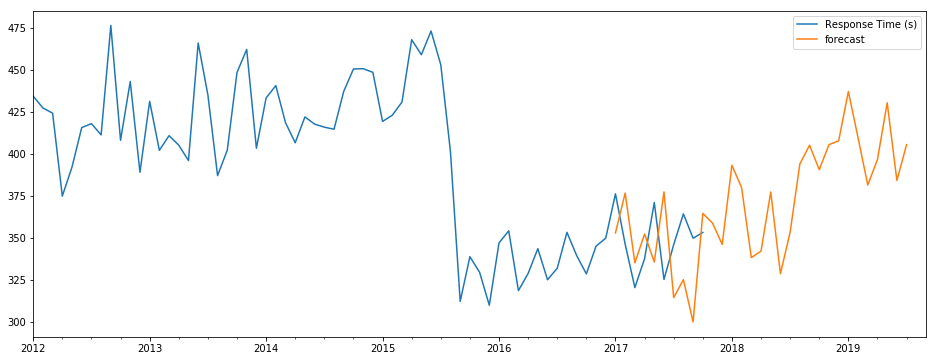

In [24]:
#Create Dataframe
RA__00_EC_df = final_df[(final_df['Response Area (COA Only)']=='00-2606')|\
                        (final_df['Response Area (COA Only)']=='00-2608')|\
                        (final_df['Response Area (COA Only)']=='00-0504')|\
                        (final_df['Response Area (COA Only)']=='00-0505')]

#Group By Month and create new dataframe
RA__00_EC_month_df = RA__00_EC_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
RA__00_EC_month_df.columns = ['Response Time (s)']
#Drop the last column. Its an outlier
RA__00_EC_month_df.drop(RA__00_EC_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA__00_EC_month_df['Response Time (s)'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA__00_EC_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_EC_month_df.columns)

future_final_df = pd.concat([RA__00_EC_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)


future_final_df[['Response Time (s)', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('Response Time Prediction for RA 00-EC.csv')


In [18]:
RA__00_EC_month_df

Response Time (s)
AFD Time Phone Pickup                   
2012-01-31                            94
2012-02-29                            69
2012-03-31                            89
2012-04-30                            62
2012-05-31                            98
2012-06-30                            76
2012-07-31                            84
2012-08-31                            92
2012-09-30                            77
2012-10-31                            79
2012-11-30                            75
2012-12-31                            65
2013-01-31                            70
2013-02-28                            63
2013-03-31                            72
2013-04-30                            72
2013-05-31                            86
2013-06-30                            85
2013-07-31                            67
2013-08-31                            78
2013-09-30                            71
2013-10-31                            70
2013-11-30                            77
2013-12-31                            83
2014-01-31                            85
2014-02-28                            78
2014-03-31                            75
2014-04-30                            73
2014-05-31                            73
2014-06-30                            67
...                                  ...
2015-05-31                            60
2015-06-30                            77
2015-07-31                            69
2015-08-31                            70
2015-09-30                            78
2015-10-31                            70
2015-11-30                            60
2015-12-31                            70
2016-01-31                            62
2016-02-29                            69
2016-03-31                            69
2016-04-30                            80
2016-05-31                            68
2016-06-30                            54
2016-07-31                            57
2016-08-31                            74
2016-09-30                            80
2016-10-31                            66
2016-11-30                            56
2016-12-31                            58
2017-01-31                            69
2017-02-28                            49
2017-03-31                            67
2017-04-30                            47
2017-05-31                            62
2017-06-30                            63
2017-07-31                            44
2017-08-31                            71
2017-09-30                            54
2017-10-31                            66

[70 rows x 1 columns]

## Goodnight

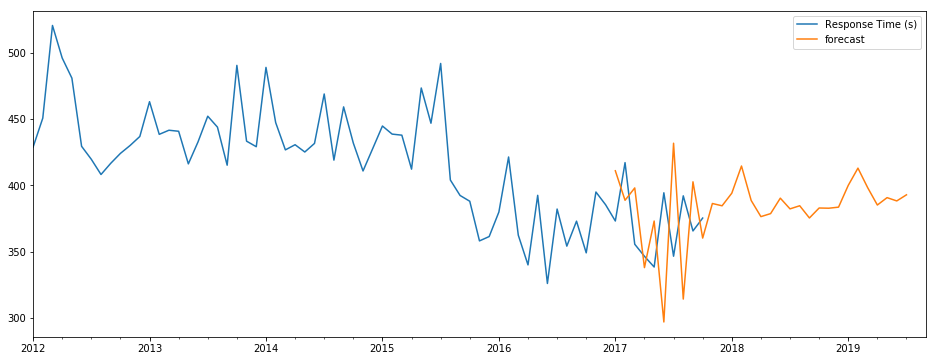

In [25]:
#Create Dataframe
RA__00_GN_df = final_df[(final_df['Response Area (COA Only)']=='00-2405')|\
                        (final_df['Response Area (COA Only)']=='00-2404')|\
                        (final_df['Response Area (COA Only)']=='00-2403')]

#Group By Month and create new dataframe
RA__00_GN_month_df = RA__00_GN_df.groupby(pd.TimeGrouper("M")).mean()['Response Time (s)'].to_frame()

#Rename the column
RA__00_GN_month_df.columns = ['Response Time (s)']
#Drop the last column. Its an outlier
RA__00_GN_month_df.drop(RA__00_GN_month_df.index[-1], inplace=True)

#Build out ARIMA Model
model = sm.tsa.statespace.SARIMAX(RA__00_GN_month_df['Response Time (s)'], order=(0,1,0), seasonal_order=(1,1,1,12))
model_result = model.fit()

#Add Forecast Dates
future_dates = [RA__00_GN_month_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=RA__00_GN_month_df.columns)

future_final_df = pd.concat([RA__00_GN_month_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)


future_final_df[['Response Time (s)', 'forecast']].plot(figsize=(16,6))
future_final_df.to_csv('Response Time Prediction for RA 00-GN.csv')

In [27]:
all_columns = list(final_df.columns)

In [28]:
all_columns

['Master Incident Number',
 'CalendarYear',
 'Cancellation Status',
 'General Dispatched Problem ',
 'Calltaker Agency (AFD or EMS)',
 'Order of AFD Arrival',
 'Response Area (COA Only)',
 'First Arriving Unit Name',
 'Response Status',
 'PriorityDescription',
 'EMS Time Phone Pickup',
 'Earliest Time Phone Pickup',
 'First Unit Assigned',
 'Did not Reduce to Code 1',
 'Onscene Time Was Correct',
 'Latitude',
 'Longitude',
 'First Unit Enroute',
 'First Unit Arrived',
 'Response Time (s)',
 'Response Time (m)']

In [30]:
AFD_13 = pd.read_csv('AFD_Fire_Incidents_2013_January_Thru_December.csv')
AFD_14 = pd.read_csv('AFD_Fire_Incidents_2014_January_Thru_December.csv')
AFD_15 = pd.read_csv('AFD_Fire_Incidents_2015_January_Thru_December.csv')
AFD_16 = pd.read_csv('AFD_Fire_Incidents_2016_January_Thru_December.csv')

In [31]:
frames = [AFD_13, AFD_14, AFD_15, AFD_16]

In [32]:
result = pd.concat(frames)

In [43]:
result = result.rename(index=str, columns={"MasterIncidentNumber": "Master Incident Number"})

In [57]:
result.columns

Index(['Master Incident Number', 'CalendarYear', 'Month', 'DayOfMonth',
       'Call_Type', 'Problem', 'Battalion', 'Jurisdiction', 'ResponseArea',
       'PriorityDescription', 'Response Status', 'Districts', 'Location 1'],
      dtype='object')

In [58]:
final_df.columns

Index(['Master Incident Number', 'CalendarYear', 'Cancellation Status',
       'General Dispatched Problem ', 'Calltaker Agency (AFD or EMS)',
       'Order of AFD Arrival', 'Response Area (COA Only)',
       'First Arriving Unit Name', 'Response Status', 'PriorityDescription',
       'EMS Time Phone Pickup', 'Earliest Time Phone Pickup',
       'First Unit Assigned', 'Did not Reduce to Code 1',
       'Onscene Time Was Correct', 'Latitude', 'Longitude',
       'First Unit Enroute', 'First Unit Arrived', 'Response Time (s)',
       'Response Time (m)'],
      dtype='object')

In [54]:
detail_final_df = final_df.join(result, on="Master Incident Number", how='left', lsuffix='_left')

In [59]:
detail_final_df = pd.merge(final_df, result, how='inner', on='Master Incident Number')

### Eastern Crescent - Fires by Type

In [65]:
detail_final_df['Problem'][(detail_final_df['Response Area (COA Only)']=='00-2606')|\
                        (detail_final_df['Response Area (COA Only)']=='00-2608')|\
                        (detail_final_df['Response Area (COA Only)']=='00-0504')|\
                        (detail_final_df['Response Area (COA Only)']=='00-0505')].value_counts()

ELEC - Electrical Fire         31
AUTO - Auto Fire               30
GRASS - Small Grass Fire       19
TRASH - Trash Fire             19
DUMP - Dumpster Fire            3
BBQ - Unsafe Cooking            1
BOXL- Structure Fire            1
BRSHL - Brush Alarm / Light     1
Name: Problem, dtype: int64

### Downtown - Fires by Type

In [67]:
detail_final_df['Problem'][detail_final_df['Response Area (COA Only)'].str.startswith('00-01')].value_counts()

TRASH - Trash Fire             74
AUTO - Auto Fire               30
DUMP - Dumpster Fire           23
ELEC - Electrical Fire         21
GRASS - Small Grass Fire       11
BRSHL - Brush Alarm / Light     1
Name: Problem, dtype: int64

### Goodnight - Fires by Type

In [69]:
detail_final_df['Problem'][(detail_final_df['Response Area (COA Only)']=='00-2405')|\
                        (detail_final_df['Response Area (COA Only)']=='00-2404')|\
                        (detail_final_df['Response Area (COA Only)']=='00-2403')].value_counts()

TRASH - Trash Fire             39
ELEC - Electrical Fire         31
AUTO - Auto Fire               17
GRASS - Small Grass Fire       10
BOXL- Structure Fire            6
DUMP - Dumpster Fire            4
BBQ - Unsafe Cooking            3
BRSHL - Brush Alarm / Light     1
Name: Problem, dtype: int64

In [70]:
detail_final_df

Master Incident Number  CalendarYear_x Cancellation Status  \
0                   13000006            2013       Not Cancelled   
1                   13000016            2013       Not Cancelled   
2                   13000263            2013       Not Cancelled   
3                   13000281            2013       Not Cancelled   
4                   13000291            2013       Not Cancelled   
5                   13000484            2013       Not Cancelled   
6                   13000543            2013       Not Cancelled   
7                   13000743            2013       Not Cancelled   
8                   13000745            2013       Not Cancelled   
9                   13000747            2013       Not Cancelled   
10                  13000780            2013       Not Cancelled   
11                  13000803            2013       Not Cancelled   
12                  13000931            2013       Not Cancelled   
13                  13000940            2013       Not Cancelled   
14                  13000946            2013       Not Cancelled   
15                  13001019            2013       Not Cancelled   
16                  13001190            2013       Not Cancelled   
17                  13001281            2013       Not Cancelled   
18                  13001360            2013       Not Cancelled   
19                  13001385            2013       Not Cancelled   
20                  13001432            2013       Not Cancelled   
21                  13001515            2013       Not Cancelled   
22                  13001542            2013       Not Cancelled   
23                  13001574            2013       Not Cancelled   
24                  13001587            2013       Not Cancelled   
25                  13001597            2013       Not Cancelled   
26                  13001599            2013       Not Cancelled   
27                  13001600            2013       Not Cancelled   
28                  13001610            2013       Not Cancelled   
29                  13001632            2013       Not Cancelled   
...                      ...             ...                 ...   
6210                16027545            2016       Not Cancelled   
6211                16027593            2016       Not Cancelled   
6212                16027597            2016       Not Cancelled   
6213                16027675            2016       Not Cancelled   
6214                16027676            2016       Not Cancelled   
6215                16027714            2016       Not Cancelled   
6216                16027845            2016       Not Cancelled   
6217                16027874            2016       Not Cancelled   
6218                16027891            2016       Not Cancelled   
6219                16027908            2016       Not Cancelled   
6220                16027923            2016       Not Cancelled   
6221                16027927            2016       Not Cancelled   
6222                16027933            2016       Not Cancelled   
6223                16027942            2016       Not Cancelled   
6224                16027945            2016       Not Cancelled   
6225                16027964            2016       Not Cancelled   
6226                16028004            2016       Not Cancelled   
6227                16028116            2016       Not Cancelled   
6228                16028141            2016          Left Blank   
6229                16028150            2016       Not Cancelled   
6230                16028161            2016       Not Cancelled   
6231                16028164            2016       Not Cancelled   
6232                16028177            2016       Not Cancelled   
6233                16028208            2016       Not Cancelled   
6234                16028211            2016       Not Cancelled   
6235                16028241            2016       Not Cancelled   
6236                16028272            2016       Not Cancell

## Moore's Crossing - Fire by Type

In [74]:

detail_final_df['Problem'][detail_final_df['Response Area (COA Only)']=='00-4209'].value_counts()




TRASH - Trash Fire        3
AUTO - Auto Fire          1
ELEC - Electrical Fire    1
Name: Problem, dtype: int64

In [78]:
detail_final_df[['Problem','Response Time (s)']][detail_final_df['Response Area (COA Only)']=='00-4209']

Problem  Response Time (s)
1847      TRASH - Trash Fire              654.0
4502        AUTO - Auto Fire              632.0
5658      TRASH - Trash Fire              735.0
5690      TRASH - Trash Fire              631.0
5833  ELEC - Electrical Fire              657.0

There have not been many calls to Moore's Crossing

In [79]:
detail_final_df.dtypes

Master Incident Number                    int64
CalendarYear_x                            int64
Cancellation Status                      object
General Dispatched Problem               object
Calltaker Agency (AFD or EMS)            object
Order of AFD Arrival                     object
Response Area (COA Only)                 object
First Arriving Unit Name                 object
Response Status_x                        object
PriorityDescription_x                    object
EMS Time Phone Pickup                    object
Earliest Time Phone Pickup               object
First Unit Assigned                      object
Did not Reduce to Code 1                 object
Onscene Time Was Correct                 object
Latitude                                  int64
Longitude                                 int64
First Unit Enroute                       object
First Unit Arrived               datetime64[ns]
Response Time (s)                       float64
Response Time (m)                       

In [81]:
detail_final_df['day_of_week'] = detail_final_df['First Unit Arrived'].dt.hour

In [82]:
detail_final_df['day_of_week']

0         Tuesday
1         Tuesday
2         Tuesday
3         Tuesday
4         Tuesday
5       Wednesday
6       Wednesday
7        Thursday
8        Thursday
9        Thursday
10       Thursday
11       Thursday
12       Thursday
13       Thursday
14       Thursday
15         Friday
16         Friday
17         Friday
18       Saturday
19       Saturday
20       Saturday
21       Saturday
22       Saturday
23       Saturday
24       Saturday
25       Saturday
26       Saturday
27       Saturday
28       Saturday
29         Sunday
          ...    
6210     Saturday
6211     Saturday
6212     Saturday
6213     Saturday
6214     Saturday
6215       Sunday
6216       Sunday
6217       Sunday
6218       Sunday
6219       Sunday
6220       Sunday
6221       Sunday
6222       Sunday
6223       Sunday
6224       Sunday
6225       Sunday
6226       Monday
6227       Monday
6228       Monday
6229       Monday
6230       Monday
6231       Monday
6232       Monday
6233       Monday
6234      

In [83]:
detail_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6240 entries, 0 to 6239
Data columns (total 34 columns):
Master Incident Number           6240 non-null int64
CalendarYear_x                   6240 non-null int64
Cancellation Status              6240 non-null object
General Dispatched Problem       6240 non-null object
Calltaker Agency (AFD or EMS)    6240 non-null object
Order of AFD Arrival             6240 non-null object
Response Area (COA Only)         6240 non-null object
First Arriving Unit Name         6240 non-null object
Response Status_x                6240 non-null object
PriorityDescription_x            6240 non-null object
EMS Time Phone Pickup            6240 non-null object
Earliest Time Phone Pickup       6240 non-null object
First Unit Assigned              6240 non-null object
Did not Reduce to Code 1         6240 non-null object
Onscene Time Was Correct         6240 non-null object
Latitude                         6240 non-null int64
Longitude                       

In [84]:
detail_final_df['hour'] = detail_final_df['First Unit Arrived'].dt.hour

In [85]:
detail_final_df['hour']

0        0
1        0
2       17
3       18
4       19
5       14
6       18
7       12
8       12
9       12
10      13
11      14
12      22
13      23
14      23
15       8
16      16
17      22
18       8
19      10
20      13
21      18
22      19
23      21
24      21
25      22
26      22
27      22
28      23
29       1
        ..
6210    16
6211    19
6212    19
6213    23
6214    23
6215     2
6216    14
6217    16
6218    18
6219    19
6220    20
6221    20
6222    21
6223    21
6224    22
6225    23
6226     4
6227    11
6228    13
6229    13
6230    14
6231    14
6232    15
6233    16
6234    17
6235    18
6236    20
6237    22
6238     1
6239     1
Name: hour, Length: 6240, dtype: int64

In [91]:

detail_final_df['late_response'] = np.where(detail_final_df['Response Time (s)'] > (60*8), 1, 0)

In [92]:
detail_final_df['late_response']

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6210    0
6211    0
6212    0
6213    1
6214    0
6215    0
6216    0
6217    0
6218    0
6219    0
6220    0
6221    0
6222    0
6223    0
6224    0
6225    0
6226    0
6227    0
6228    0
6229    0
6230    0
6231    0
6232    0
6233    0
6234    1
6235    0
6236    0
6237    0
6238    0
6239    0
Name: late_response, Length: 6240, dtype: int64

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [108]:
detail_final_df_dummies = pd.get_dummies(detail_final_df, columns=['Problem', 'day_of_week', 'hour'])

In [130]:
detail_final_df_dummies['Problem_BBQ - Unsafe Cooking']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6210    0
6211    0
6212    0
6213    0
6214    0
6215    0
6216    0
6217    0
6218    0
6219    0
6220    0
6221    0
6222    0
6223    0
6224    0
6225    0
6226    0
6227    0
6228    0
6229    0
6230    0
6231    0
6232    0
6233    0
6234    0
6235    0
6236    0
6237    0
6238    0
6239    0
Name: Problem_BBQ - Unsafe Cooking, Length: 6240, dtype: uint8

In [109]:
detail_final_df_dummies.columns

Index(['Master Incident Number', 'CalendarYear_x', 'Cancellation Status',
       'General Dispatched Problem ', 'Calltaker Agency (AFD or EMS)',
       'Order of AFD Arrival', 'Response Area (COA Only)',
       'First Arriving Unit Name', 'Response Status_x',
       'PriorityDescription_x', 'EMS Time Phone Pickup',
       'Earliest Time Phone Pickup', 'First Unit Assigned',
       'Did not Reduce to Code 1', 'Onscene Time Was Correct', 'Latitude',
       'Longitude', 'First Unit Enroute', 'First Unit Arrived',
       'Response Time (s)', 'Response Time (m)', 'CalendarYear_y', 'Month',
       'DayOfMonth', 'Call_Type', 'Battalion', 'Jurisdiction', 'ResponseArea',
       'PriorityDescription_y', 'Response Status_y', 'Districts', 'Location 1',
       'late_response', 'Problem_AUTO - Auto Fire',
       'Problem_BBQ - Unsafe Cooking', 'Problem_BOX -Structure Fire',
       'Problem_BOXL- Structure Fire', 'Problem_BRSHL - Brush Alarm / Light',
       'Problem_DUMP - Dumpster Fire', 'Problem_E

In [110]:
del detail_final_df_dummies['hour_0']

In [111]:
del detail_final_df_dummies['day_of_week_Sunday']

In [112]:
del detail_final_df_dummies['Problem_AUTO - Auto Fire']

In [140]:
X = detail_final_df_dummies[[
       'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday',
    'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23']]

In [141]:
y = detail_final_df_dummies['late_response']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [143]:
dt = DecisionTreeClassifier()

In [144]:
model = dt.fit(X_train, y_train)

In [145]:
preds_dt = dt.predict(X_train)

In [146]:
dt.score(X_test, y_test)

0.90576923076923077

In [147]:
import graphviz
from sklearn.tree import export_graphviz
data = export_graphviz(model, out_file=None, feature_names=X.columns)
graph = graphviz.Source(data)
graph.render(view=True)

'Source.gv.pdf'

In [148]:
dt.feature_importances_

array([ 0.13808367,  0.02600591,  0.08487429,  0.09062558,  0.10421637,
        0.04780786,  0.02204927,  0.05256006,  0.02359098,  0.00994812,
        0.0123353 ,  0.02150347,  0.07029664,  0.03226841,  0.01909009,
        0.02951583,  0.00872101,  0.01790272,  0.01652909,  0.01074483,
        0.03541506,  0.01626609,  0.03084271,  0.01593107,  0.00762391,
        0.0082941 ,  0.01782555,  0.01589811,  0.01323388])

In [172]:
zipped = zip(X.columns, dt.feature_importances_)
zipped_sorted = sorted(zipped, key=lambda x: x[1], reverse=True)
for feat, importance in zipped_sorted:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: day_of_week_Friday, importance: 0.13808367400436952
feature: day_of_week_Tuesday, importance: 0.10421636726424968
feature: day_of_week_Thursday, importance: 0.09062557785013504
feature: day_of_week_Saturday, importance: 0.0848742872131208
feature: hour_7, importance: 0.07029664149112574
feature: hour_2, importance: 0.05256006337414777
feature: day_of_week_Wednesday, importance: 0.04780786479002341
feature: hour_15, importance: 0.035415063896409686
feature: hour_8, importance: 0.032268405787092114
feature: hour_17, importance: 0.03084271033456167
feature: hour_10, importance: 0.029515830772608595
feature: day_of_week_Monday, importance: 0.026005909359758026
feature: hour_3, importance: 0.023590980819781275
feature: hour_1, importance: 0.02204927050219795
feature: hour_6, importance: 0.021503474086542986
feature: hour_9, importance: 0.019090093175089702
feature: hour_12, importance: 0.017902721374852337
feature: hour_21, importance: 0.01782554697317417
feature: hour_13, importan

In [150]:
lr = LogisticRegression()

In [151]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
preds_lr = lr.predict(X_train)

In [153]:
lr.score(X_test, y_test)

0.90576923076923077

In [138]:
import statsmodels.api as sm

In [154]:
X2 = sm.add_constant(X)
est = sm.Logit(y, X2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.310876
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          late_response   No. Observations:                 6240
Model:                          Logit   Df Residuals:                     6210
Method:                           MLE   Df Model:                           29
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                 0.01344
Time:                        23:01:23   Log-Likelihood:                -1939.9
converged:                       True   LL-Null:                       -1966.3
                                        LLR p-value:                  0.004386
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.1920      0.257     -8.536      0.000      -2.695      -1.

In [156]:
linr = LinearRegression()

In [157]:
y_lin = detail_final_df_dummies['Response Time (s)']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y_lin)

In [159]:
linr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [161]:
X2linr = sm.add_constant(X)
estlinr = sm.OLS(y, X2)
est2linr = estlinr.fit()
print(est2linr.summary())

                            OLS Regression Results                            
Dep. Variable:          late_response   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.884
Date:                Sat, 09 Dec 2017   Prob (F-statistic):            0.00281
Time:                        23:09:14   Log-Likelihood:                -1186.3
No. Observations:                6240   AIC:                             2433.
Df Residuals:                    6210   BIC:                             2635.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [162]:
y = detail_final_df_dummies['late_response']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [164]:
rf = RandomForestClassifier()

In [165]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [166]:
reds_rf = rf.predict(X_train)

In [167]:
rf.score(X_test, y_test)

0.90000000000000002

In [168]:
rf.feature_importances_

array([ 0.08135008,  0.05944697,  0.0634444 ,  0.07174886,  0.07560003,
        0.07768212,  0.0177645 ,  0.03052194,  0.01299615,  0.03565562,
        0.02193055,  0.01552511,  0.05109218,  0.02378911,  0.02523786,
        0.0219701 ,  0.0239617 ,  0.02117189,  0.02203603,  0.02835784,
        0.04263407,  0.03238015,  0.02153143,  0.02512438,  0.01498782,
        0.02110238,  0.01738395,  0.01825306,  0.0253197 ])

In [171]:
zipped = zip(X.columns, rf.feature_importances_)
zipped_sorted = sorted(zipped, key=lambda x: x[1], reverse=True)
for feat, importance in zipped_sorted:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

feature: day_of_week_Friday, importance: 0.08135008466586177
feature: day_of_week_Wednesday, importance: 0.07768211715172109
feature: day_of_week_Tuesday, importance: 0.0756000306313383
feature: day_of_week_Thursday, importance: 0.07174885836391129
feature: day_of_week_Saturday, importance: 0.06344439807916244
feature: day_of_week_Monday, importance: 0.059446972547837706
feature: hour_7, importance: 0.05109217923988901
feature: hour_15, importance: 0.04263407320076095
feature: hour_4, importance: 0.03565561543367206
feature: hour_16, importance: 0.032380151015793016
feature: hour_2, importance: 0.03052194175567448
feature: hour_14, importance: 0.02835784360390744
feature: hour_23, importance: 0.025319701365464915
feature: hour_9, importance: 0.025237864538289533
feature: hour_18, importance: 0.025124383378087544
feature: hour_11, importance: 0.023961695262123016
feature: hour_8, importance: 0.023789108756579174
feature: hour_13, importance: 0.022036030760818035
feature: hour_10, import